In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
def distr(n,r,plot=False):
    coord=np.zeros((n,2),dtype='float32')
    for i in range(n):
        coord[i,0]=r*np.sin(np.pi*((2*i+1)/n))
        coord[i,1]=r*np.cos(np.pi*((2*i+1)/n))
    if plot:
        plt.scatter(coord[:,0],coord[:,1])
        plt.show()
    return coord

In [3]:
def CGR(data=None,seq_base=['A','G','T','C','R'],sf=False,res=100):
    r=1.
    base_num=len(seq_base)
    if base_num==4:
        base_coord=np.array([[1,-1],[-1,-1],[-1,1],[1,1]])
        base={seq_base[i]:base_coord[i] for i in range(base_num)}
    else:
        base_coord=distr(base_num,r)
        base={seq_base[i]:base_coord[i] for i in range(base_num)}
    # print(base)
    if not sf:
        sf=1-np.sin(np.pi/base_num)/(np.sin(np.pi/base_num)+np.sin(np.pi*(1/base_num+2*((base_num//4)/base_num))))
    data_len=len(data)
    points=[]
    A=np.zeros((res,res),dtype='float32')
    pt=np.zeros(2,dtype='float32')
    for i in range(data_len):
        pt=pt+(base[data[i]]-pt)*sf
        points.append(pt)
        x=((pt[0]+r)*res/(2*r)).astype('int')
        y=((pt[1]+r)*res/(2*r)).astype('int')
        # print(x,y)
        A[x][y]=A[x][y]+1
    return {'FCGR':A,'cgr_points':points}

In [4]:
# data=pd.read_csv('/data/HWK/DeepGene/HIV.csv')
data=pd.read_csv('/data/HWK/DeepGene/data/E.coli/preprocessed/FCGR/E.coli_raw_FCGR_input.csv',encoding=)
data

,Unnamed: 0,11657_5#1,11657_5#10,11657_5#11,11657_5#12,11657_5#13,11657_5#14,11657_5#15,11657_5#16,11657_5#17,...,18090_8#29,18090_8#3,18090_8#30,18090_8#33,18090_8#4,18090_8#5,18090_8#6,18090_8#7,18090_8#8,18090_8#84
0,0,C,G,G,G,G,G,G,C,G,...,G,G,C,G,G,G,G,G,G,G
1,1,C,T,T,T,T,T,T,C,T,...,T,T,C,T,T,T,T,T,T,T
2,2,A,A,A,A,A,A,A,A,A,...,A,A,A,A,A,A,A,A,A,A
3,3,T,T,T,T,T,T,T,T,T,...,T,T,T,T,T,T,T,T,T,T
4,4,C,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245138,245138,C,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
245139,245139,C,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
245140,245140,C,C,C,C,C,C,C,C,C,...,C,C,C,C,C,C,C,C,C,C
245141,245141,T,T,T,T,T,T,T,T,T,...,T,C,T,T,T,T,T,T,T,T


{'A': array([ 1, -1]), 'C': array([-1, -1]), 'T': array([-1,  1]), 'G': array([1, 1])}


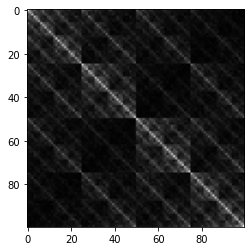

In [6]:
seq_base=["A","C","T","G"]
# data=np.random.choice(seq_base,1000)
res=CGR(data=data['11657_5#1'].values,seq_base=seq_base,res=100)
plt.imshow(res['FCGR'],cmap='gray')
plt.show()

In [7]:
plt.imsave('test.png',res['FCGR'],cmap='gray')

In [22]:
def show_FCGR(file):
    data=pd.read_csv(file,encoding='utf-8')
    im=data.values
    plt.imshow(im,cmap='gray')
    plt.show()

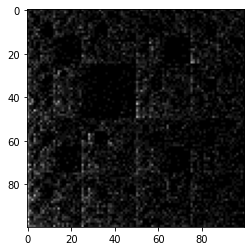

In [25]:
show_FCGR('/data/HWK/DeepGene/test_output.csv')